In [1]:
# imports for the HW
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob
import torch
import torchvision
import random

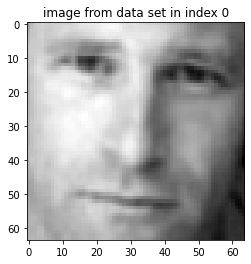

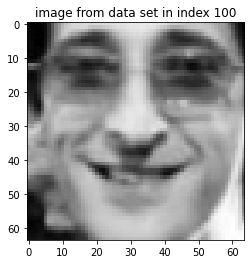

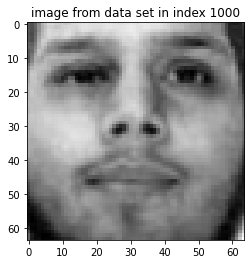

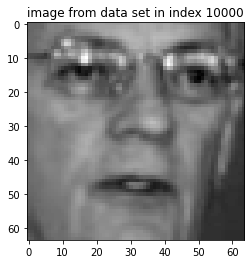

In [2]:
# a - Pre-processing & covariance matrix

# -- 1 --

# Load the images into a numpy array
img_dir = "../given_data/LFW/LFW" # Enter Directory of all images  
pgm_files = glob.glob("../given_data/LFW/LFW/*.pgm")

# Load the PGM files into a list of numpy arrays
images = []
for file in pgm_files:
    images.append(cv2.imread(file, cv2.IMREAD_GRAYSCALE))
    
images = np.array(images)

# Display four of the images
indices_to_display = [0, 100, 1000, 10000]
for i in indices_to_display:
    plt.title(f"image from data set in index %d" % i)
    plt.imshow(images[i], cmap='gray')
    plt.show()


In [3]:

# -- 2 --

X = np.array([images[i].flatten('F') for i in range(len(images))]).T


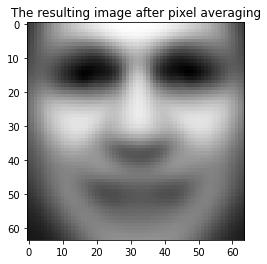

In [4]:
#X = np.reshape(images, (4096, 13233), order='F')


# -- 3 --

# Calculate mean of each pixel
mu = np.mean(X, axis=1)

# Reshape mean vector into 64x64 image
mu_image = np.reshape(mu, (64, 64), order='F')

# Display the mean image
plt.title("The resulting image after pixel averaging")
plt.imshow(mu_image, cmap='gray')
plt.show()

mu = np.reshape(mu,(4096,1))
Y = X - mu


# -- 4 --

Y_covariance = np.cov(Y)




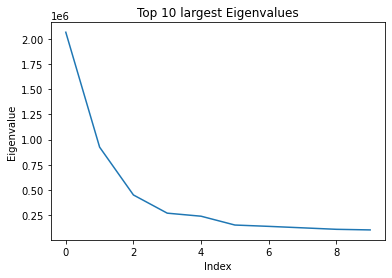

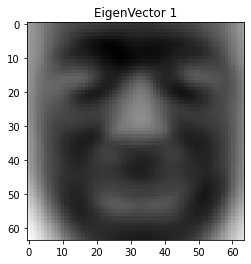

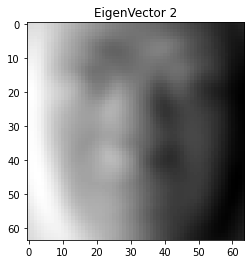

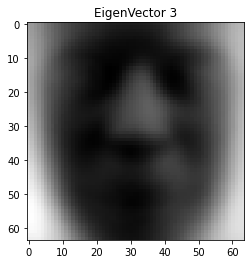

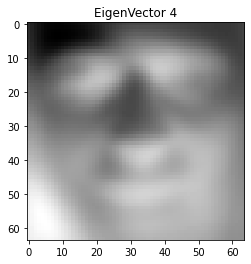

In [5]:
# 2.b - Principal Components

all_eig_vals, all_eig_vecs = np.linalg.eigh(Y_covariance)
k = 10

idx = all_eig_vals.argsort()[::-1]   
all_eig_vals = all_eig_vals[idx]
all_eig_vecs = all_eig_vecs[:,idx]

eig_vals = all_eig_vals[:k]
eig_vecs = all_eig_vecs[:, :k]


plt.plot(eig_vals)
plt.title('Top 10 largest Eigenvalues')
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.show()


# Plot the first 4 eigenvectors as images
for i in range(4):
    # reshape the eigenvectors to 64x64 images
    eig_vecs_image = np.reshape(eig_vecs[:,i],(64,64),'F')
    plt.title("EigenVector %d" % (i+1))
    plt.imshow(eig_vecs_image, cmap='gray')
    plt.show()
    



In [6]:
# 2.c - Compression by projection

P = np.matmul(eig_vecs.T, Y) 

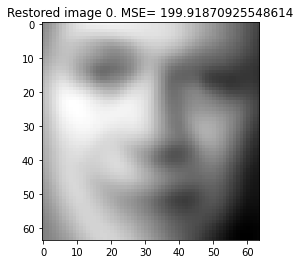

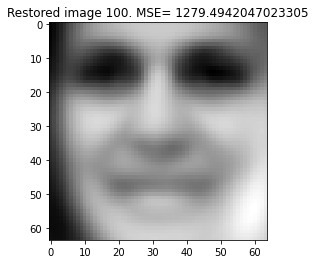

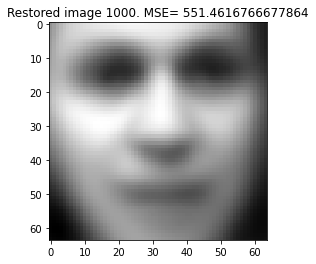

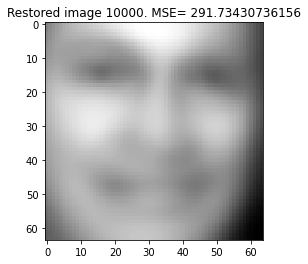

In [7]:
# 2.d - Restoration

for i in indices_to_display:
    pi = np.reshape(P[:, i], (k, 1))
    xi = np.matmul(eig_vecs, pi) + mu
    xi = np.reshape(xi, (64, 64), 'F')
    mse = np.mean((images[i] - xi) ** 2)
    plt.title(f"Restored image {i}. MSE= {mse}")
    plt.imshow(xi, cmap='gray')
    plt.show()
    


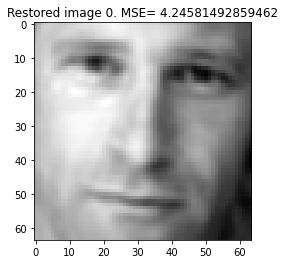

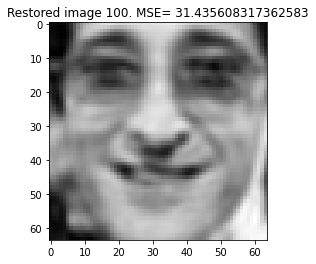

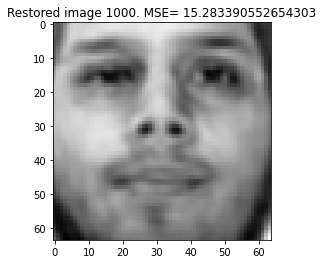

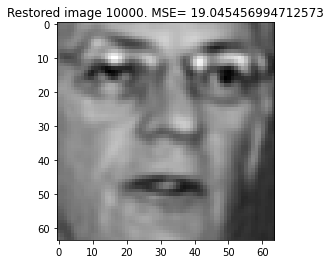

In [10]:
# 2.e - Changing value
k = 570
eig_vals = all_eig_vals[:k]
eig_vecs = all_eig_vecs[:, :k]


P = np.matmul(eig_vecs.T, Y) 

for i in indices_to_display:
    pi = np.reshape(P[:, i], (k, 1))
    xi = np.matmul(eig_vecs, pi) + mu
    xi = np.reshape(xi, (64, 64), 'F')
    mse = np.mean((images[i] - xi) ** 2)
    plt.title(f"Restored image {i}. MSE= {mse}")
    plt.imshow(xi, cmap='gray')
    plt.show()
    

    